<a href="https://colab.research.google.com/github/Jeremias333/datascience-quarentena-dados/blob/master/QuaretenaDadosFilmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Aula 01

In [3]:
import pandas as pd
#read_csv return a dataframe, that is a structure of data for better visualization.
movies = pd.read_csv("./database/movies.csv")
movies.head()
#to see documentation add ? behind of variable and then control+enter. ex: ?filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
rating = pd.read_csv("./database/ratings.csv")
# rating.head()
# rating.shape
# len(rating)
# rating.describe()
# rating.query("movieId==1")["rating"].mean()
# rating.columns = ["user", "movie", "rating", "timestamp"]
# rating.describe()

# grade_by_average = rating.groupby("movie")["rating"].mean()

# rating.describe
# movies.head()

import matplotlib.pyplot as plt

# name_movie = movies.query("movieId==1")["title"]
# print (name_movie)

# qttMoviesNor = len(movies)
# qttMoviesRat = len(rating)
# moviesNoRat = 

# for y in range (rating.size):
#   if rating.query("movieId=="+str(y))["rating"].isNull():
#     print(rating.query("movieId=="+str(y))["movieId"])
#     # moviesNoRat.add(rating.query("movie=="+str(y))["movie"])
#     break





# rating.query("movie==1")["rating"].plot(kind="hist", title="Rating of "+name_movie)
# plt.title("Rating of "+movies.query("movieId==1")["title"])
# plt.show()




Todos os Desafios da Aula 01 abaixo:

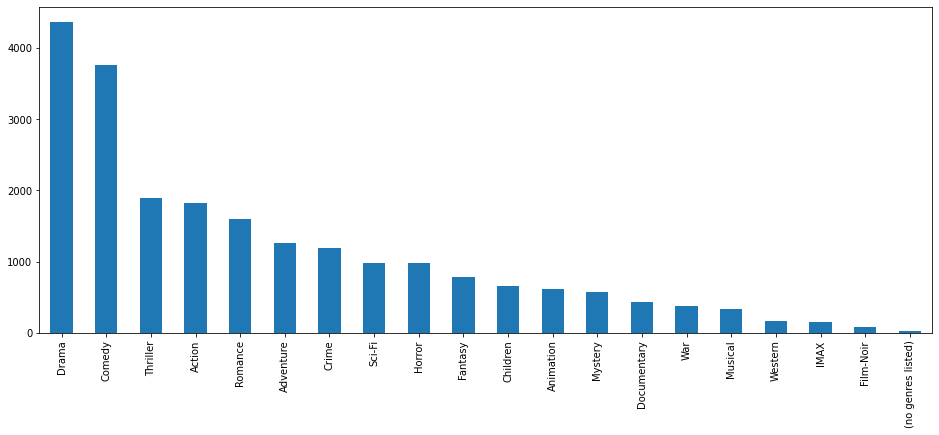

In [5]:
ratingAllMean = rating.groupby("movieId")["rating"].mean()
movieWithMean = movies.join(ratingAllMean, on="movieId")
movieWithMean.head()

#desafio 2
movieWithMean.columns = ["movieId", "title", "genres", "rating_mean"] 

#desafio 1
withoutRating = movieWithMean["rating_mean"].isnull()
movieWithMean[withoutRating].count()["title"]

#desafio 3
ratingCount = rating.groupby("movieId")["rating"].count()
ratingCount.head()

movieWithMeanAndRating = movieWithMean.join(ratingCount, on="movieId")
movieWithMeanAndRating = movieWithMeanAndRating.rename(columns={"rating" : "total_of_rating"})
# movieWithMeanAndRating.head()

#desafio 4
movieWithMeanAndRating["rating_mean"] = movieWithMeanAndRating["rating_mean"].round(2)
movieWithMeanAndRating

#desafio 5
genresDf = movieWithMeanAndRating.genres.str.get_dummies("|")
genres = genresDf.columns.to_list()
genres

#desafio 6
totalMoviesGenres = movieWithMeanAndRating.genres.str.get_dummies().sum()
totalMoviesGenres

#desafio 7
totalMoviesGenres.sort_values(ascending=False).plot(kind='bar', figsize=(16, 6))



### Aula 02

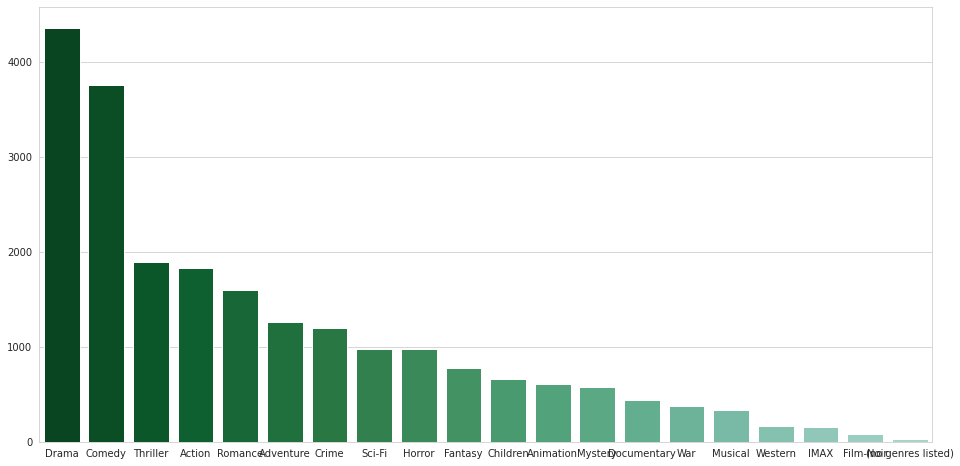

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#read_csv return a dataframe, that is a structure of data for better visualization.
movies = pd.read_csv("./database/movies.csv")
rating = pd.read_csv("./database/ratings.csv")
sns.set_style("whitegrid")

#Get all genres of movies and sort in descrecent order.
movies["genres"].str.get_dummies("|").sum().sort_values(ascending=False)
#Testing the method index of Series
movies["genres"].str.get_dummies("|").sum().sort_values(ascending=True).index
#Testing pie graphic and size
#movies["genres"].str.get_dummies("|").sum().sort_values(ascending=False).plot(kind="pie",  figsize=(8,8), title="Filmes Genres")

#The bar plot of pandas have the better way to show graphics for us use
# movies["genres"].str.get_dummies("|").sum().sort_values(ascending=False).plot(kind="bar",  figsize=(8,8), title="Filmes Genres")

plt.figure(figsize=(16,8))
moviesGenres = movies["genres"].str.get_dummies("|").sum().sort_values(ascending=False);

sns.barplot(x=moviesGenres.index, 
            y=moviesGenres.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(moviesGenres) +10))

plt.show()



count    12.000000
mean      3.041667
std       0.752521
min       2.000000
25%       2.750000
50%       3.000000
75%       3.625000
max       4.000000
Name: rating, dtype: float64

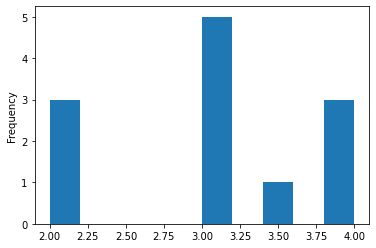

In [17]:
# moviesWithMean = movies.join()
movieWithMean.sort_values("rating_mean", ascending=False)[2450:2500]


def plot_movie(n):
  ratingMovie = rating.query(f"movieId=={n}")["rating"]
  ratingMovie.plot(kind="hist")
  return ratingMovie.describe()

plot_movie(999)

###Aula 03
